# Model Interpretability

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from train import *
import os
import datetime
from collections import Counter
from itertools import product
import itertools
import operator
import random
import matplotlib.pyplot as plt
import statistics
import optuna
from sklearn.model_selection import cross_val_score
from scipy.sparse import csr_matrix, save_npz, load_npz
import joblib
import shap
shap.initjs()

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.fontManager.addfont("/home/materialsinformatics/anaconda3/envs/py39torch/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams['figure.subplot.bottom'] = 0.2
plt.rcParams['figure.subplot.left'] = 0.2
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 18
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [7]:
def vec2csr(vec, csr_file_name, columns_file_name):
    csr = csr_matrix(vec)
    save_npz(csr_file_name, csr)
    if columns_file_name != None:
        columns_arr = np.array(vec.columns)
        np.save(columns_file_name, columns_arr)
def csr2vec(csr_file_name, columns_file_name):
    if columns_file_name == None:
        vec = load_npz(csr_file_name).toarray()
    else:
        vec = pd.DataFrame(load_npz(csr_file_name).toarray(),
             columns=np.load(columns_file_name,allow_pickle=True))
    return vec

# Feature Importance

In [11]:
FTI = pd.read_csv("data/model/interpret/fti_sum_all_Interpret_RF_sp1_oliynyk_zero_r0.csv")

In [16]:
mat,proc = [],[]
for i in range(len(FTI)):
    if "Substrate_stack" in FTI["Unnamed: 0"][i]:
        mat.append(FTI["0"][i])
    if "Substrate" in FTI["Unnamed: 0"][i] and "Substrate_stack" not in FTI["Unnamed: 0"][i]:
        proc.append(FTI["0"][i])
print(sum(mat))
print(sum(proc))

0.0115332145987585
0.0005334884996540922


In [12]:
mat,proc = [],[]
for i in range(len(FTI)):
    if "ETL_stack" in FTI["Unnamed: 0"][i]:
        mat.append(FTI["0"][i])
    if "ETL" in FTI["Unnamed: 0"][i] and "ETL_stack" not in FTI["Unnamed: 0"][i]:
        proc.append(FTI["0"][i])
print(sum(mat))
print(sum(proc))

0.0563100857494007
0.07582986922848553


In [15]:
mat,proc = [],[]
for i in range(len(FTI)):
    if "Perovskite_composition" in FTI["Unnamed: 0"][i]:
        mat.append(FTI["0"][i])
    if "Perovskite" in FTI["Unnamed: 0"][i] and "Perovskite_composition" not in FTI["Unnamed: 0"][i]:
        proc.append(FTI["0"][i])
print(sum(mat))
print(sum(proc))

0.22513741799847145
0.4106843364355477


In [13]:
mat,proc = [],[]
for i in range(len(FTI)):
    if "HTL_stack" in FTI["Unnamed: 0"][i]:
        mat.append(FTI["0"][i])
    if "HTL" in FTI["Unnamed: 0"][i] and "HTL_stack" not in FTI["Unnamed: 0"][i]:
        proc.append(FTI["0"][i])
print(sum(mat))
print(sum(proc))

0.0704739572752963
0.04757165050393414


In [14]:
mat,proc = [],[]
for i in range(len(FTI)):
    if "Backcontact_stack" in FTI["Unnamed: 0"][i]:
        mat.append(FTI["0"][i])
    if "Backcontact" in FTI["Unnamed: 0"][i] and "Backcontact_stack" not in FTI["Unnamed: 0"][i]:
        proc.append(FTI["0"][i])
print(sum(mat))
print(sum(proc))

0.0161425632280733
0.0336410281229787


In [17]:
["Add_lay_front", "Add_lay_front_stack_sequence","Add_lay_back", "Add_lay_back_stack_sequence", "Encapsulation", "Encapsulation_stack_sequence", "Encapsulation_edge_sealing_materials"]

['Add_lay_front',
 'Add_lay_front_stack_sequence',
 'Add_lay_back',
 'Add_lay_back_stack_sequence',
 'Encapsulation',
 'Encapsulation_stack_sequence',
 'Encapsulation_edge_sealing_materials']

In [20]:
color = []
for i in range(len(fti_sum)):
    if "Substrate" in fti_sum["Unnamed: 0"][i]:
        color.append("#FFF2CC")
    elif "ETL" in fti_sum["Unnamed: 0"][i]:
        color.append("#DEEBF7")
    elif "Perovskite" in fti_sum["Unnamed: 0"][i]:
        color.append("#DAC2EC")
    elif "HTL" in fti_sum["Unnamed: 0"][i]:
        color.append("#FBE5D6")
    elif "Backcontact" in fti_sum["Unnamed: 0"][i]:
        color.append("#E2F0D9")
    else:
        color.append("#E4E3E3")

<Figure size 1400x300 with 0 Axes>

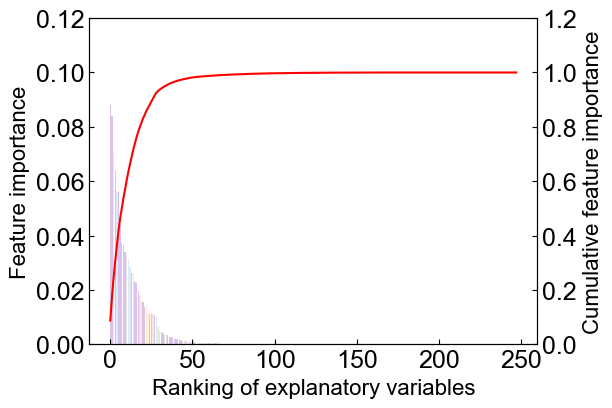

In [21]:
plt.figure(figsize=(14,3))
fti_sum = pd.read_csv("data/model/interpret/fti_sum_all_Interpret_RF_sp1_oliynyk_zero_r0.csv")
fti = fti_sum.iloc[:,1]
acc_fti = list(itertools.accumulate(fti))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(range(248), fti,
        color=color, label="Feature importance")
ax2.plot(range(248), acc_fti,
        color="red", label="Cumulative feature importance")
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.set_ylim([0, 0.12])
ax1.set_ylabel("Feature importance",fontsize=16)
ax2.set_ylim([0, 1.2])
ax2.set_ylabel("Cumulative feature importance",fontsize=16)
plt.rcParams['font.size'] = 16
ax1.set_xlabel("Ranking of explanatory variables",fontsize=16)
plt.savefig("FTI_acc.png",dpi=300)

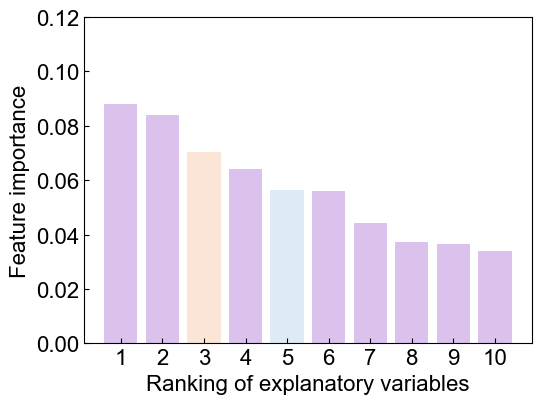

In [22]:
# FTI top10
fig, ax1 = plt.subplots()
ax1.bar(range(1,11), fti[0:10],
        color=color, label="Feature importance")
handler1, label1 = ax1.get_legend_handles_labels()
ax1.set_ylim([0, 0.12])
plt.xticks( np.arange(1, 11, 1))
ax1.set_ylabel("Feature importance",fontsize=16)
plt.rcParams['font.size'] = 16
ax1.set_xlabel("Ranking of explanatory variables",fontsize=16)
plt.savefig("FTI_top10.png",dpi=300)

# SHAP value visualization

In [14]:
X = pd.DataFrame(load_npz('data/csr/all_sp1_oliynyk_zero_csr.npz').toarray(),
             columns=np.load('data/csr/all_sp1_oliynyk_zero_columns.npy',
                             allow_pickle=True))
X_train,X_test=train_test_split(X,test_size=0.2, random_state=0)
del X_test, X

In [24]:
all_shap = csr2vec('data/model/interpret/shap_model_all_RF_sp1_oliynyk_zero_r0_csr.npz', None)

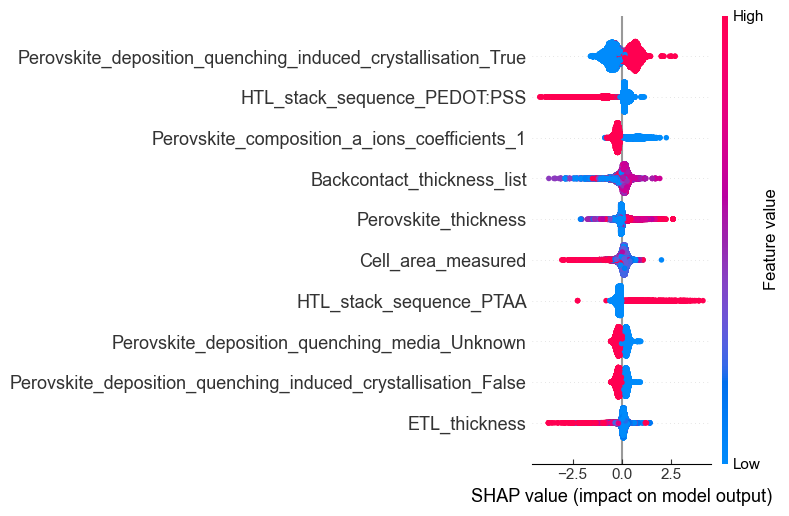

In [21]:
fig = plt.gcf()
i=29549
shap.summary_plot(all_shap[0:i], X_train[0:i],  max_display=10)
fig.savefig("data/shap_all_10.png", bbox_inches='tight',dpi=300)